# Volume 4: Heat Flow
    Benj McMullin
    Math 436
    11/9/2023

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import matplotlib.animation as animate
from scipy.sparse import diags
from scipy import sparse
from scipy.sparse.linalg import spsolve
from IPython.display import HTML

In [7]:
%matplotlib inline

In [8]:
def function(x, t, v, f):
    
    # Create the lambda coefficient
    λ = v * (t[1] - t[0]) / ((x[1] - x[0]) ** 2)
    
    #sub_t makes the correct amount of subintervals, sub_x for x subintervals
    sub_t = len(t)
    sub_x = len(x)
    
    # Create the A matrix
    less = λ * np.concatenate([np.ones(sub_x - 2), np.array([0])])
    normal  = np.concatenate([np.array([1]), (1 - 2 * λ) * np.ones(sub_x - 1), np.array([1])])
    more = np.concatenate([np.array([0]), λ * np.ones(sub_x - 2)])
    k = [less, normal, more]
    offset = [-1, 0, 1]
    A = diags(k, offset).toarray()
    
    # Use the initial condition to create the first row of U
    U = f(x)
    
    # Use the boundary conditions to create the first and last column of U
    for i in range(sub_t - 1):
        if i > 0:
            U = np.vstack([U, A @ U[-1]])
        else: U = np.vstack([U, A @ U])
    
    return U

In [9]:
def animation(x,u,title):
    # Initialize the figure
    plt.ioff()
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    
    # Set the x and y limits
    ax.set_xlim(min(x), max(x))
    ax.set_ylim((min(min(i) for i in u), max(max(i) for i in u)))
    
    # Label the axes
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title(title)
    
    # Create the trajectory
    trajectory, = plt.plot([], [])
    
    def update(t):
        # Update the trajectory
        trajectory.set_data(x,u[t])
        return trajectory
    
    # Create the animation
    plt.ioff()
    ani = animate.FuncAnimation(fig, update, frames = range(u.shape[0]), interval = 25, repeat = True)
    ani.save(f'{title}.mp4')

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = 0.05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{0.2 - |x-0.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.
Plot the approximation at $t=0, t=0.4$, and $t=1$.

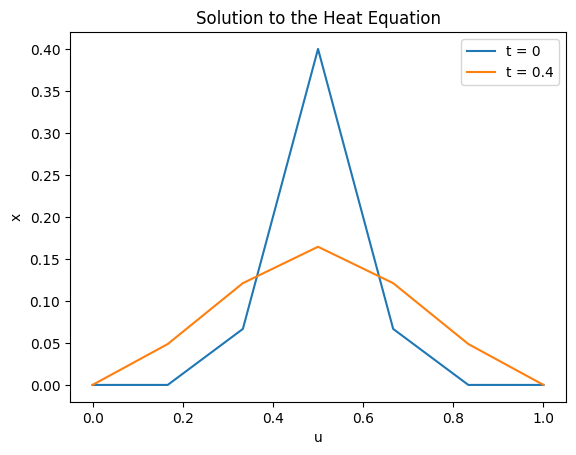

In [10]:
# Initialize the parameters
x = np.linspace(0, 1, 7)
t = np.linspace(0, 1, 11)
f = lambda x: 2 * np.where(0.2 - np.abs(x - 0.5) > 0, 0.2 - np.abs(x - 0.5), 0)

# Solve the heat equation
u = function(x, t, 0.05, f)

# Plot the solution
plt.plot(x, u[0], label = 't = 0')
plt.plot(x, u[4], label = 't = 0.4')
plt.ylabel('x')
plt.xlabel('u')
plt.title('Solution to the Heat Equation')
plt.legend()
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


In [11]:
# Initialize the parameters
x = np.linspace(-12, 12, 141)
t = np.linspace(0, 1, 71)
f = lambda x: np.where(1 - (x ** 2) > 0, 1 - (x ** 2), 0)

# Solve the heat equation
u = function(x, t, 1, f)

# Plot the solution with animation
plt.ioff()
animation(x, u, 'Heat Equation 1')
plt.ioff()
HTML('<video src="heat_equation1.mp4" controls>')

`<video src="heat_equation1.mp4" controls>`

In [12]:

# Initialize the parameters
x = np.linspace(-12, 12, 141)
t = np.linspace(0, 1, 67)
f = lambda x: np.where(1 - (x ** 2) > 0, 1 - (x ** 2), 0)

# Solution to the heat equation
u = function(x, t, 1, f)

# Plot the solution with animation
plt.ioff()
animation(x, u, 'Heat Equation 2')
plt.ioff()
HTML('<video src="heat_equation2.mp4" controls>')

`<video src="heat_equation2.mp4" controls>`

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem
\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}
Note that this is an implicit linear scheme; hence, the most efficient way to find $U^{j+1}$ is to create the matrix $B$ as a sparse matrix and then use \li{scipy.sparse.linalg.solve}.

Demonstrate that the numerical approximation at $t = 1$ converges.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in the lab.
The slope of the line there shows the order of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition, and we can safely use the same number of intervals in time and space.

In [1]:
def heat_cn(nu,f,xb,tb,nx,nt):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
        
        Parameters:
            a - left x boundary (float)
            b - right x boundary (float)
            alpha - left BC (float)
            beta - right BC (float)
            f - initial position (function)
            nu - heat diffusion coefficient (float)
            T - final time (float)
            nx - number of x steps (int)
            nt - number of time steps (int)
            
        Returns:
            U - approximate solution (ndarray(nt,nx))
            x - position array (ndarray(nx,))
    """
    # Create the x and t arrays
    x = np.linspace(xb[0], xb[1], nx + 1)
    t = np.linspace(tb[0], tb[1], nt + 1)
    # Create the number of subintervals for x and t
    sub_t = len(t)
    sub_x = len(x)
    
    # Create the lambda coefficient
    λ = nu * (t[1] - t[0]) / (2 * (x[1] - x[0]) ** 2)
    
    # Create the A matrix
    less = λ * np.concatenate([np.ones(sub_x-2), np.array([0])])
    normal  = np.concatenate([np.array([1]), (1 - 2 * λ) * np.ones(sub_x - 1), np.array([1])])
    more = np.concatenate([np.array([0]), λ * np.ones(sub_x - 2)])
    k = [less, normal, more]
    offset = [-1, 0, 1]
    A = sparse.csr_matrix(diags(k, offset))
    
    # Create the B matrix
    less = -λ * np.concatenate([np.ones(sub_x - 2), np.array([0])])
    normal  = np.concatenate([np.array([1]), (1 + 2 * λ) * np.ones(sub_x - 1), np.array([1])])
    more = np.concatenate([np.array([0]), -λ * np.ones(sub_x - 2)])
    k = [less, normal, more]
    B = sparse.csr_matrix(diags(k, offset))
    
   # Use the initial condition to create the first row of U
    U = f(x)
    U = np.vstack([U, spsolve(B, A @ U)])
    for i in range(sub_t - 2):
        
        U = np.vstack([U, spsolve(B, A @ U[-1])])
    
    # Return the solution and the x array
    return U, x[1] - x[0]

In [5]:
# Make an array of step numbers
stepnums = [20, 40, 80, 160, 320, 640]
# Initialize the parameters
us = []
errs = []
hs = []
f = lambda x: np.where(1 - (x ** 2) > 0, 1 - (x ** 2), 0)

# Solve the heat equation for each step number
for i, j in enumerate(reversed(stepnums)):

    u,h = heat_cn(1, f, [-12, 12], [0, 1], j, j)
    if i > 0:
        
        error = max(np.abs( us[0][-1][::640//j] - u[-1]))
        errs.append(error)
        
        # h values
        hs.append(h)
        
    us.append(u)

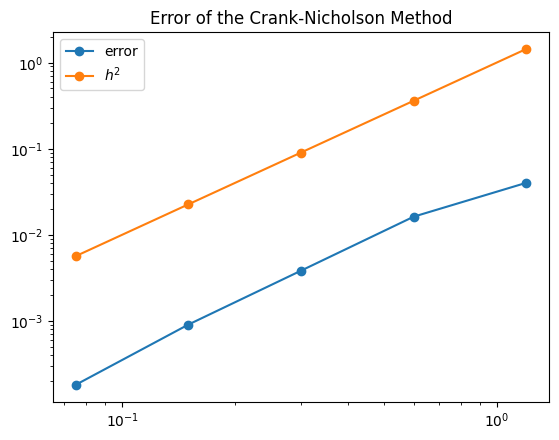

In [6]:
# Plot the errors
plt.loglog(hs, errs, "-o", label = 'error')
plt.loglog(hs, [i ** 2 for i in hs], "-o", label = '$h^2$')
plt.title('Error of the Crank-Nicholson Method')
plt.legend()
plt.show()